In [ ]:
# This file runs a "Leave One Out Cross Validation" by
# -looping through each individual,
# -training a RF model with remaining individuals,
# -calculating accuracy and f1-score of the model with left-out individual
# -print the confusion matrix and graph the overall accuracy and f1-score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


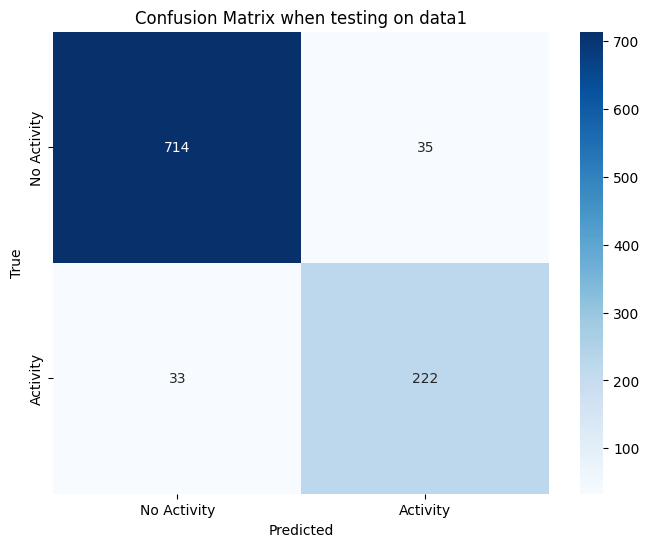

data1 has been tested on everyone


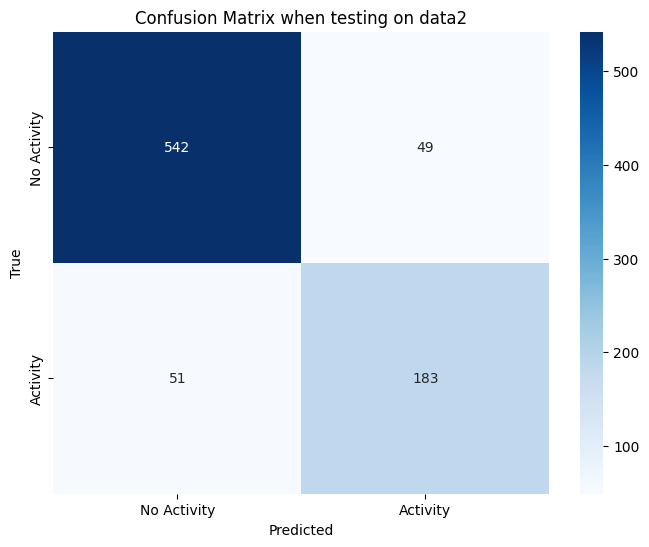

data2 has been tested on everyone


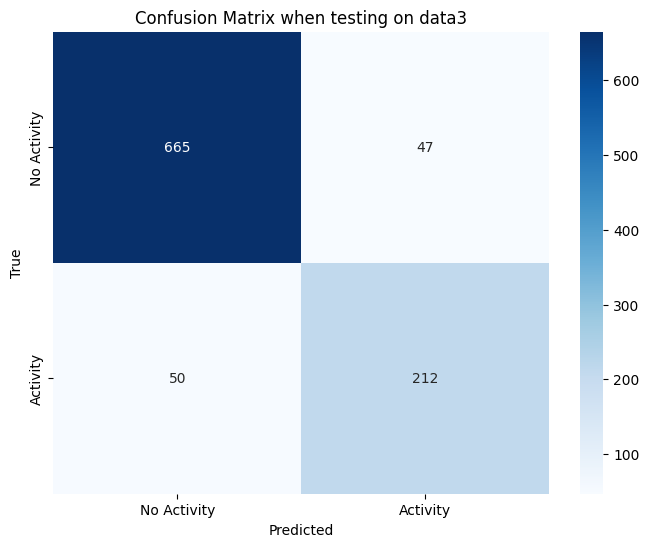

data3 has been tested on everyone


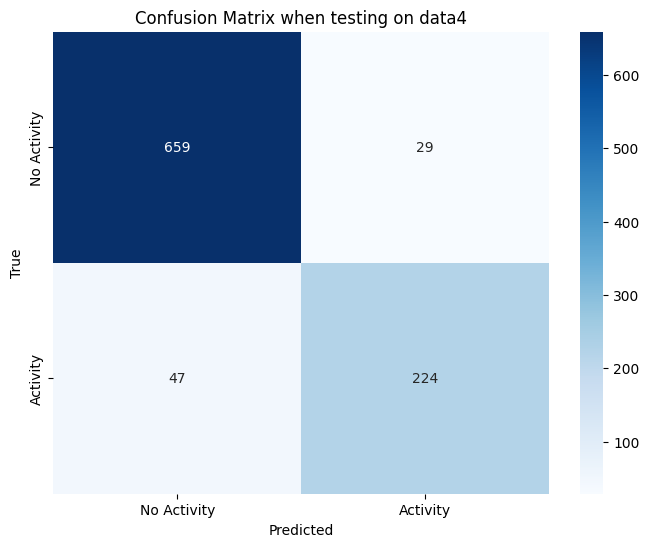

data4 has been tested on everyone


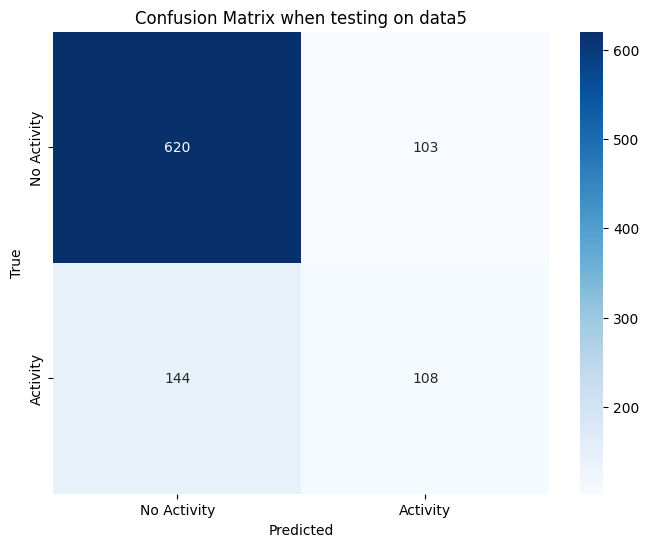

data5 has been tested on everyone


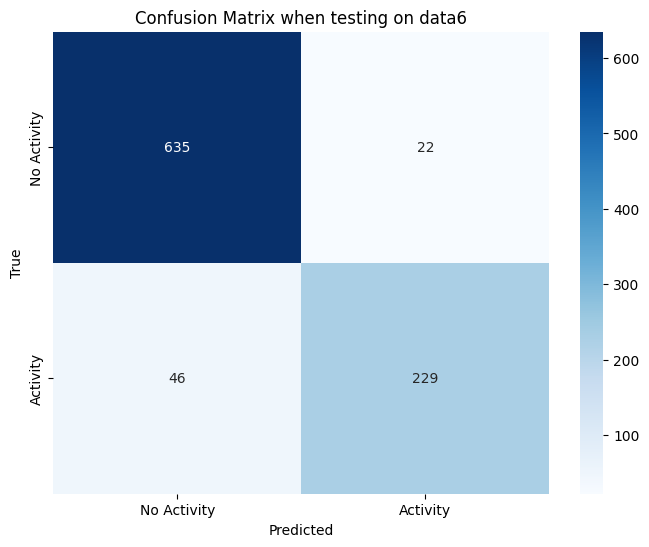

data6 has been tested on everyone


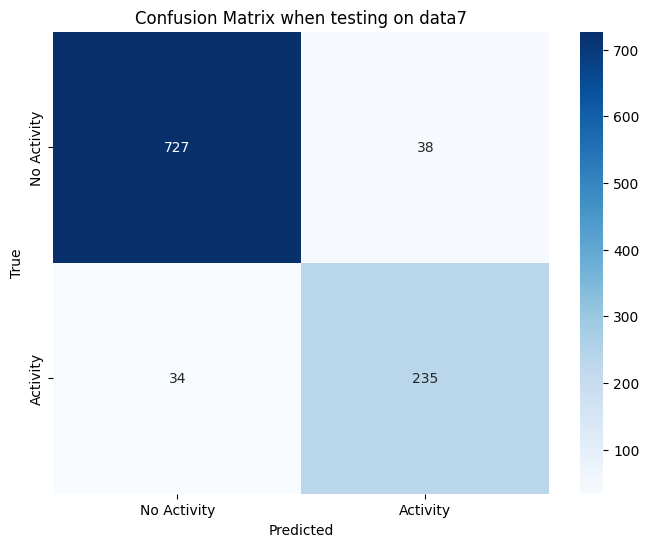

data7 has been tested on everyone


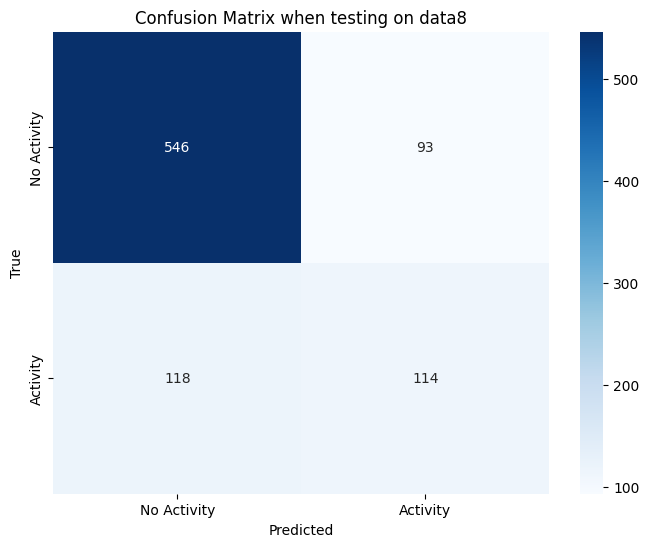

data8 has been tested on everyone


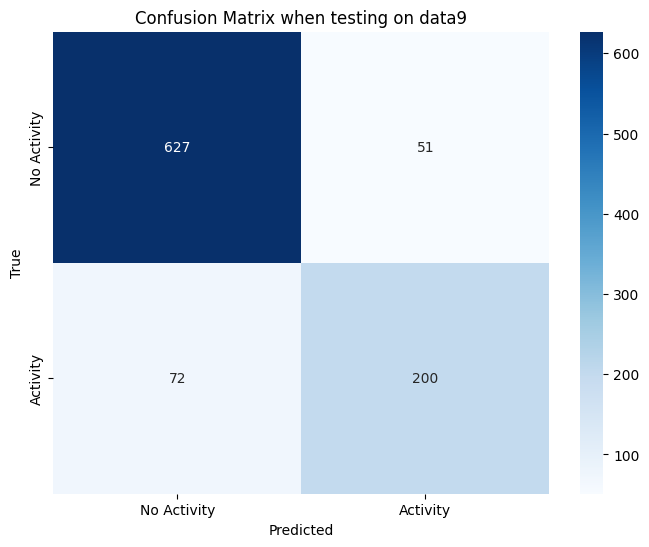

data9 has been tested on everyone


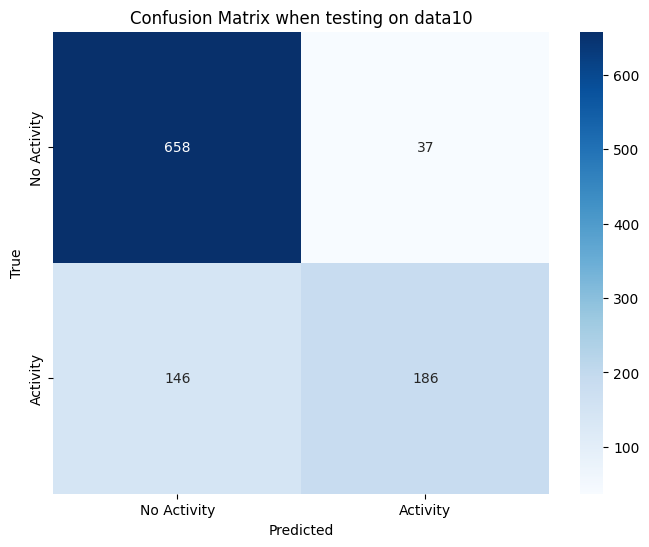

data10 has been tested on everyone


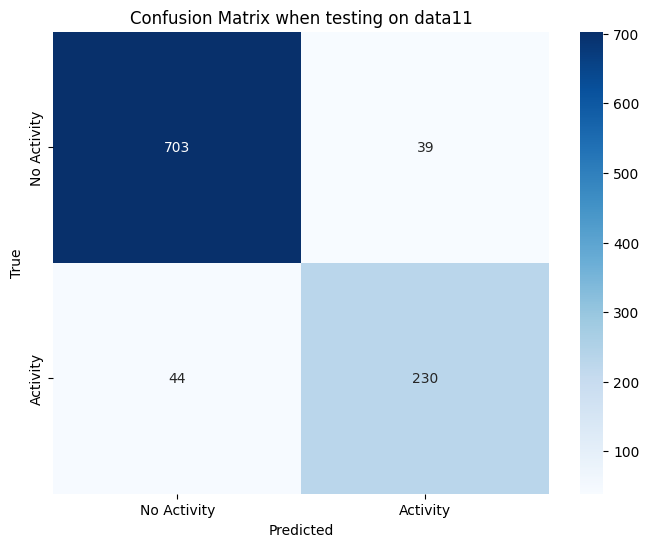

data11 has been tested on everyone


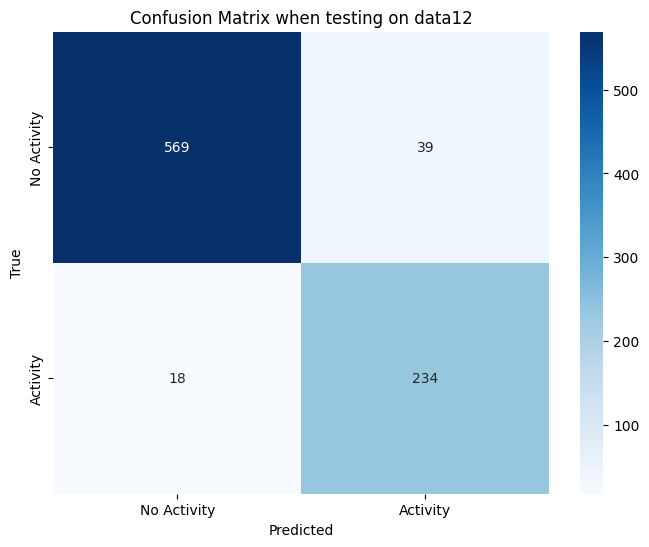

data12 has been tested on everyone


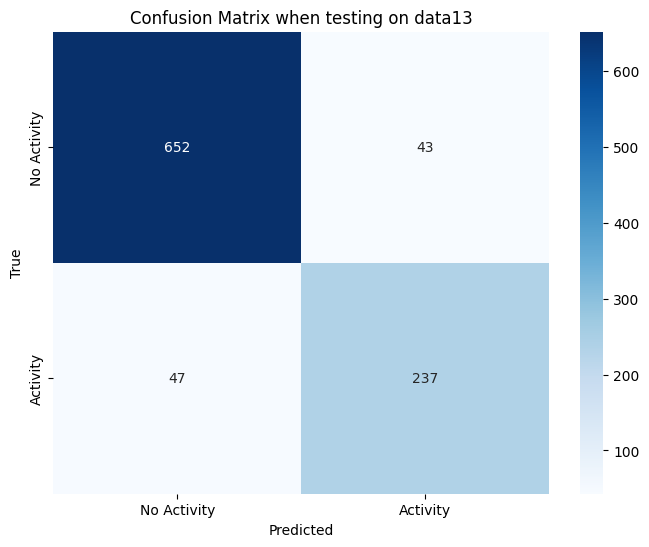

data13 has been tested on everyone


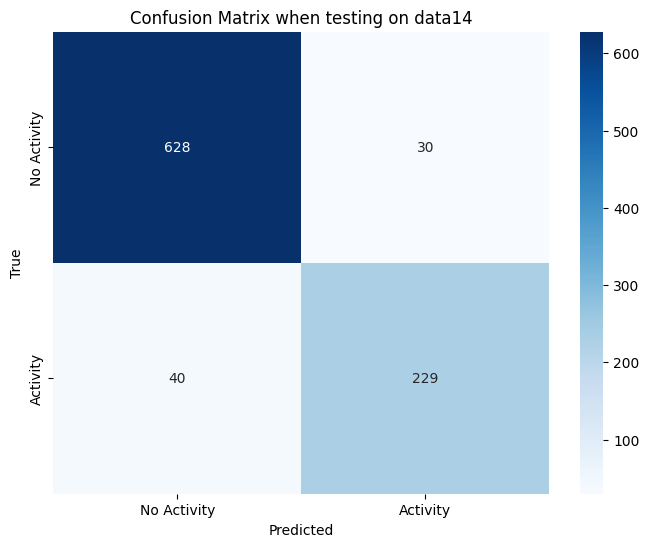

data14 has been tested on everyone


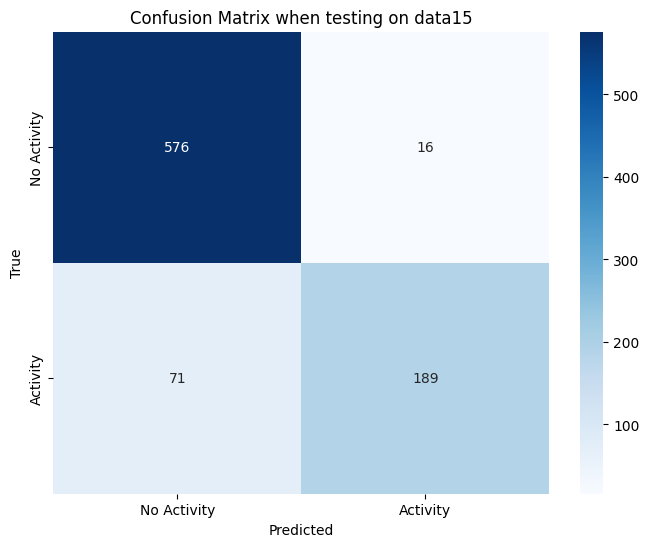

data15 has been tested on everyone


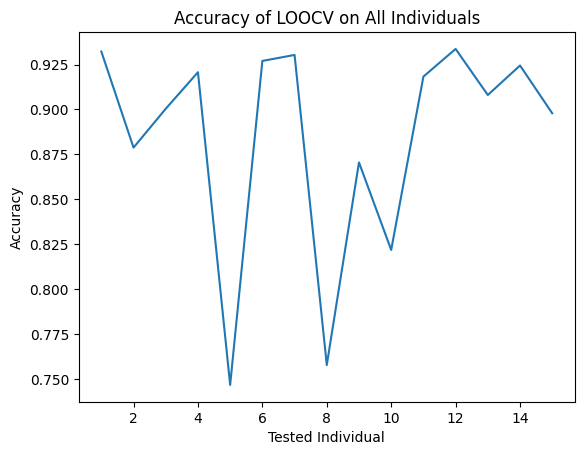

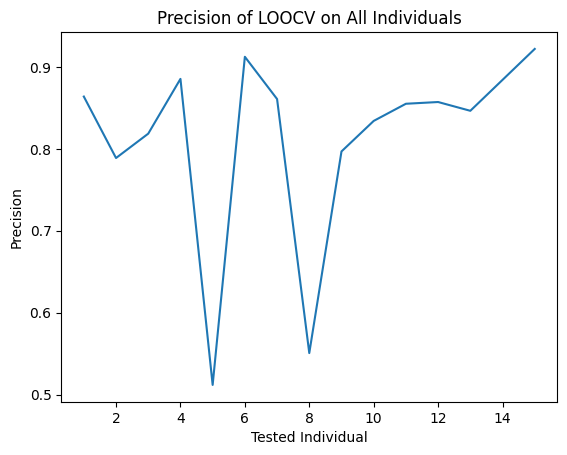

Average Accuracy:  0.8845901717189533
Average Precision:  0.812523244603994


In [10]:
dataframes = {}
for i in range(15):
    name = f"data{i+1}"
    data = pd.read_csv(f"/content/drive/My Drive/ResearchProject/HAR/HAR/ppg+dalia/data/PPG_FieldStudy/S{i+1}/S{i+1}_E4/specific_windowed_features.csv")
    allFeatures  = [col for col in data.columns if col not in ["start_time", "end_time"]]
    data = data[allFeatures]
    data = data[~data['activity'].isin([0])]
    data.loc[data['activity'].isin([1, 2, 7, 8, 9]), 'activity'] = 0
    data.loc[data['activity'].isin([3, 4, 5, 6]), 'activity'] = 1
    dataframes[name] = data

LOOCVAccuracy = np.array([])
LOOCVf1_score = np.array([])
for tester in dataframes:
    trainingFeatures  = [col for col in dataframes[tester].columns if col not in ["activity", "start_time", "end_time"]]

    testingFeatures = dataframes[tester][trainingFeatures].to_numpy()
    testingActivity = dataframes[tester]["activity"].to_numpy()

    X_train = pd.DataFrame()
    y_train = pd.DataFrame()
    for trainer in dataframes:
        if trainer != tester:
            X_train = pd.concat([X_train, dataframes[trainer][trainingFeatures]], ignore_index=True)
            y_train = pd.concat([y_train, dataframes[trainer]["activity"]], ignore_index=True)

    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy().flatten()

    testingFeatures = StandardScaler().fit_transform(testingFeatures)
    X_train = StandardScaler().fit_transform(X_train)

    rf = RandomForestClassifier(n_estimators=300)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(testingFeatures)
    cmat = confusion_matrix(testingActivity, y_pred) #validate model predictions with actual y values
    labels = ["No Activity", "Activity"]

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cmat, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix when testing on {tester}")
    plt.show()

    LOOCVAccuracy = np.append(LOOCVAccuracy, accuracy_score(testingActivity, y_pred))
    LOOCVf1_score = np.append(LOOCVf1_score, precision_score(testingActivity, y_pred))

    print(f"{tester} has been tested on everyone")

plt.plot(np.arange(1,16), LOOCVAccuracy)
plt.title("Accuracy of LOOCV on All Individuals")
plt.xlabel("Tested Individual")
plt.ylabel("Accuracy")
plt.show()

plt.plot(np.arange(1,16), LOOCVf1_score)
plt.title("Precision of LOOCV on All Individuals")
plt.xlabel("Tested Individual")
plt.ylabel("Precision")
plt.show()

print("Average Accuracy: ", sum(LOOCVAccuracy) / len(LOOCVAccuracy))
print("Average Precision: ", sum(LOOCVf1_score) / len(LOOCVf1_score))

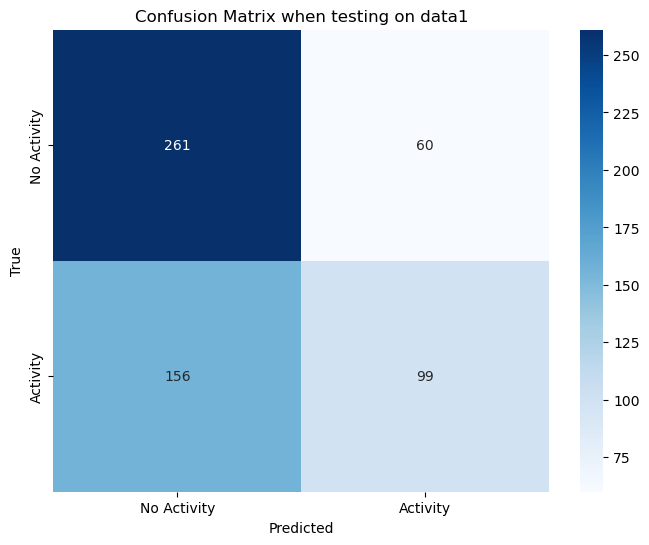

data1 has been tested on everyone


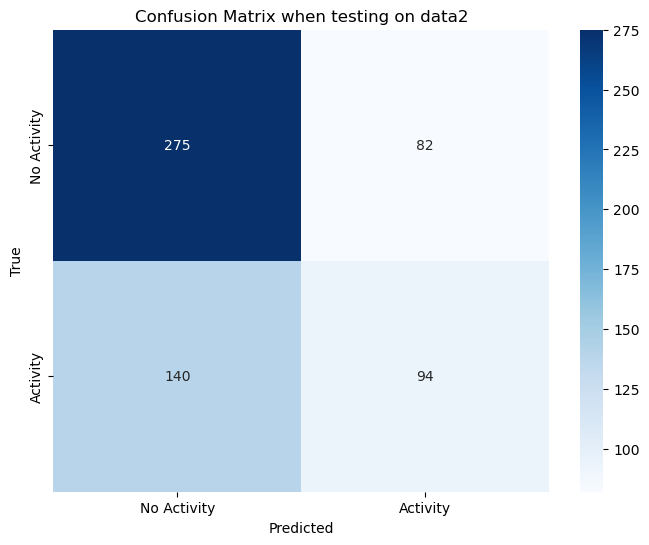

data2 has been tested on everyone


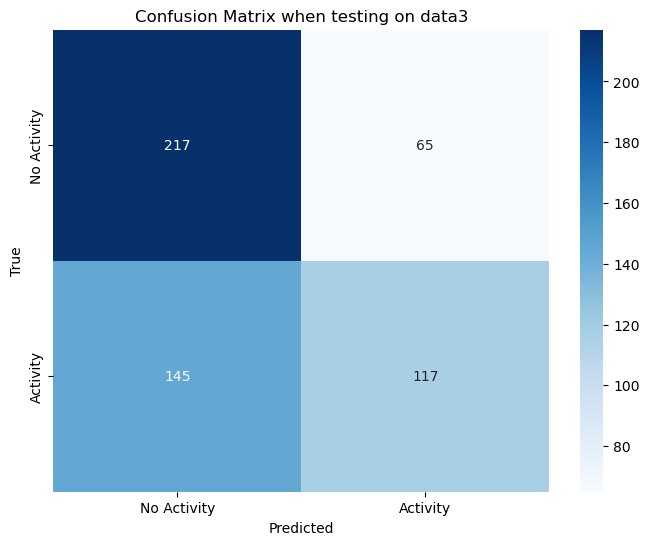

data3 has been tested on everyone


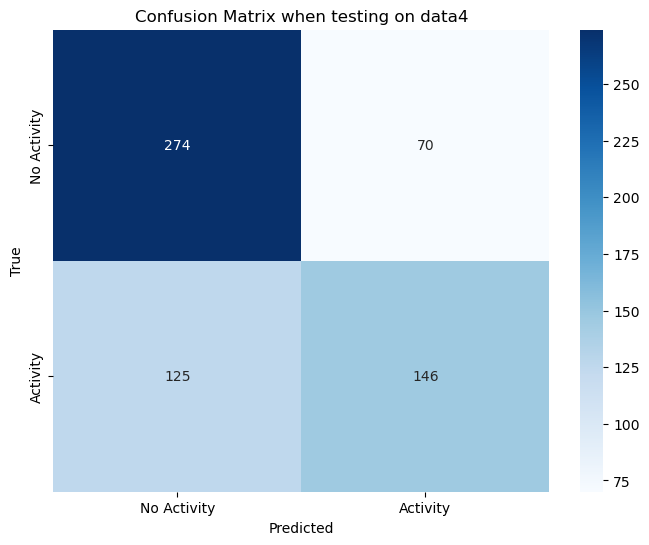

data4 has been tested on everyone


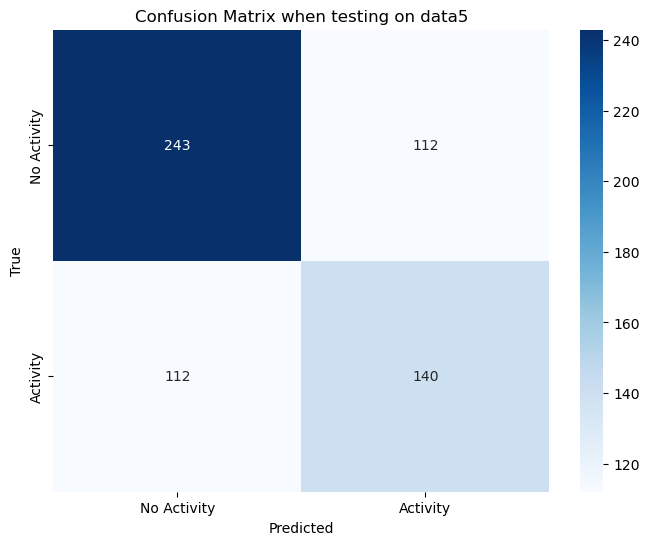

data5 has been tested on everyone


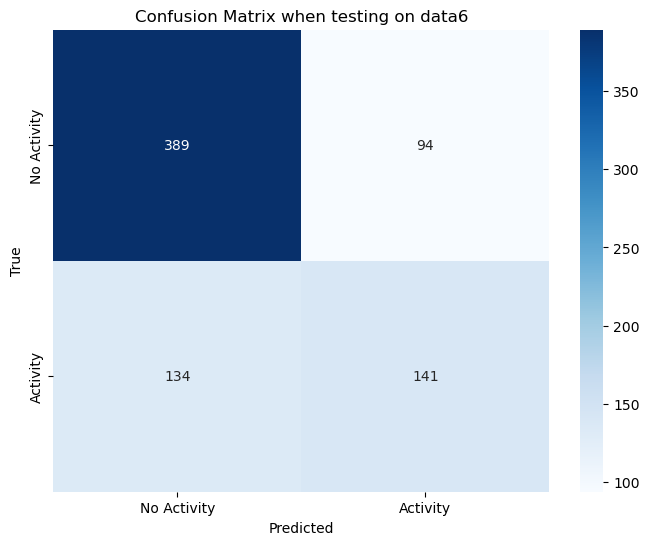

data6 has been tested on everyone


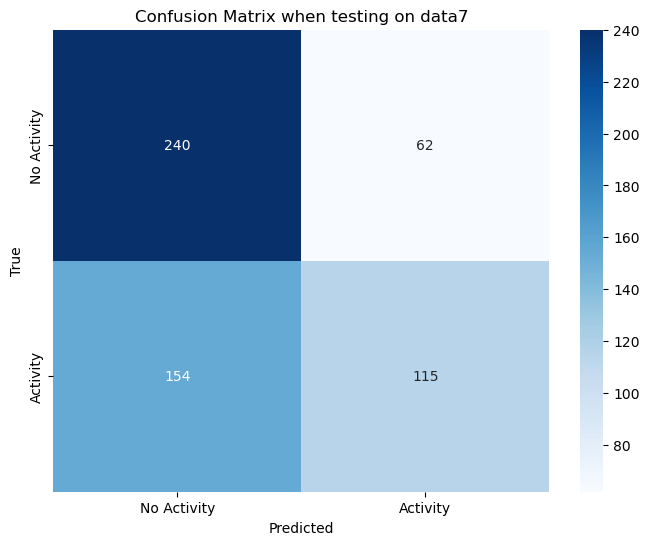

data7 has been tested on everyone


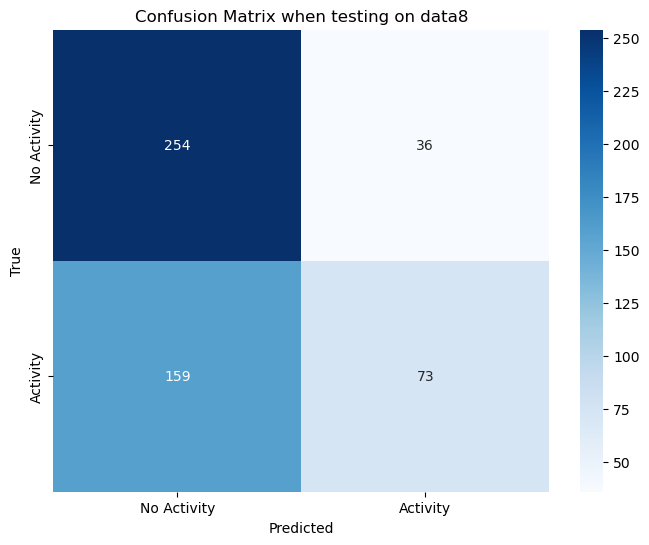

data8 has been tested on everyone


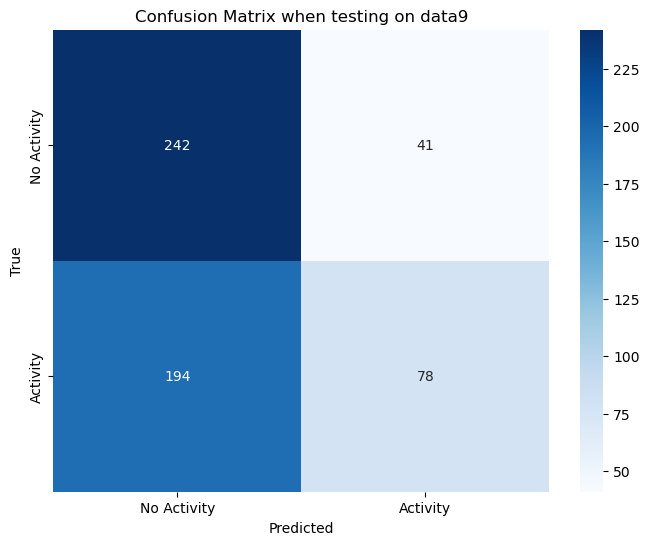

data9 has been tested on everyone


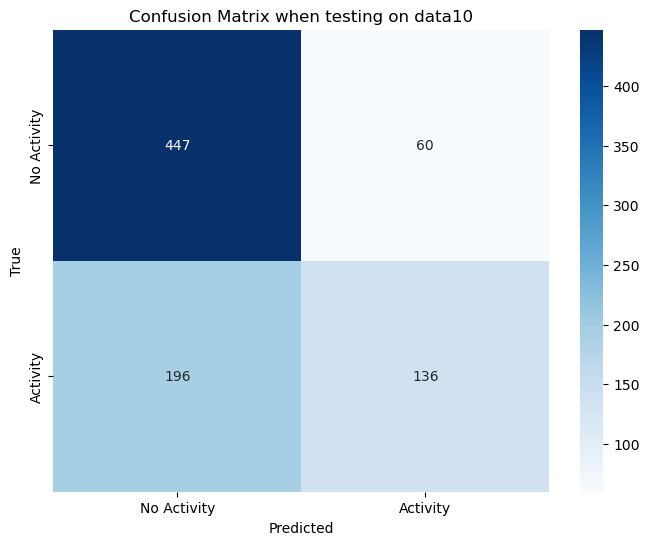

data10 has been tested on everyone


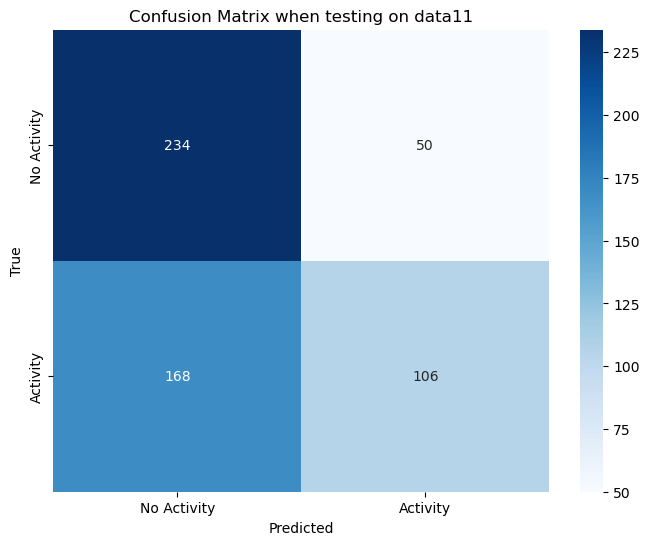

data11 has been tested on everyone


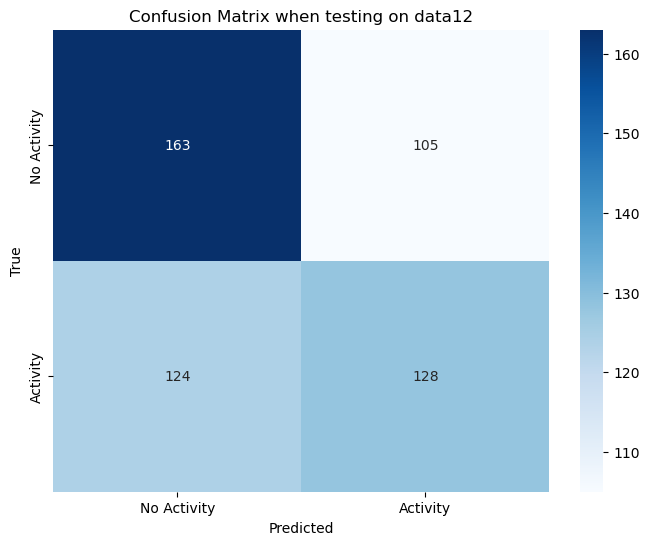

data12 has been tested on everyone


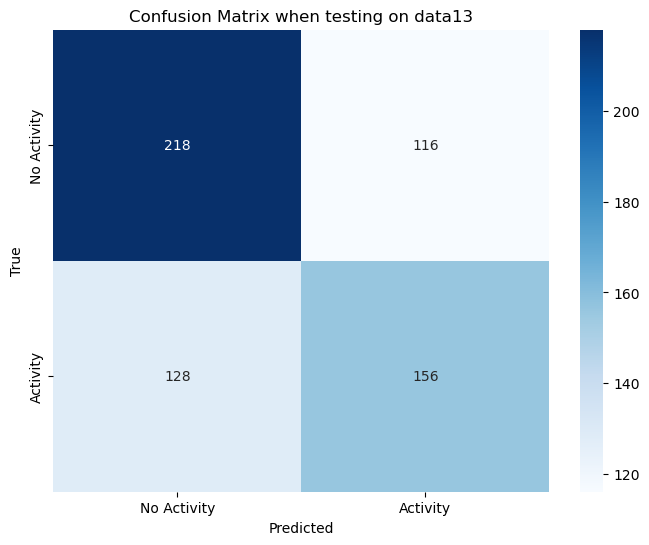

data13 has been tested on everyone


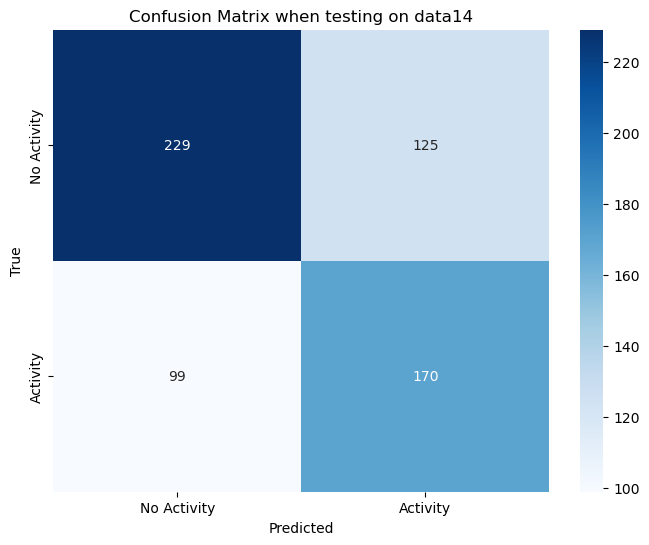

data14 has been tested on everyone


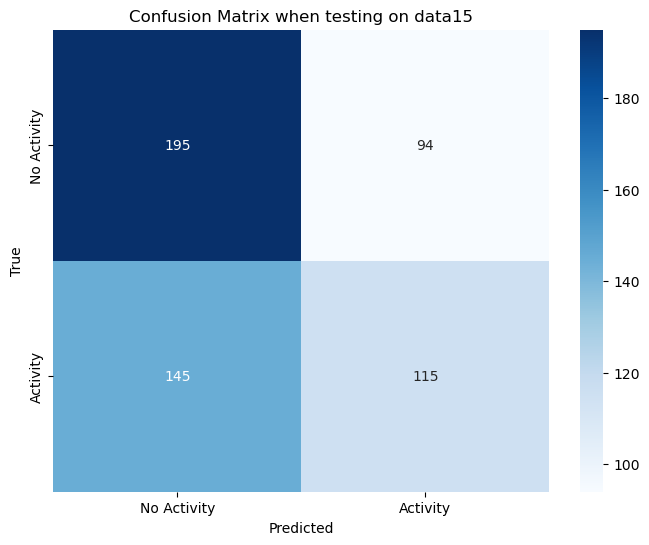

data15 has been tested on everyone


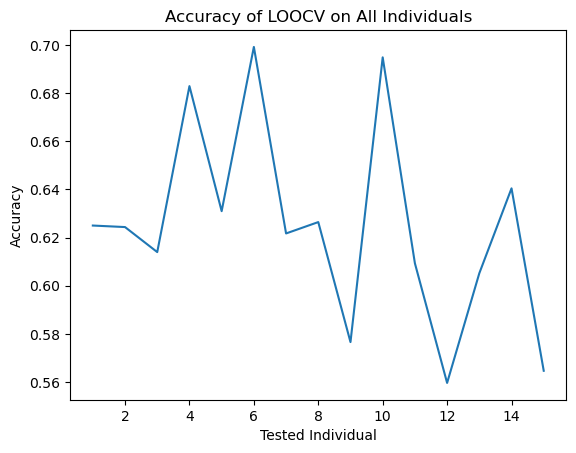

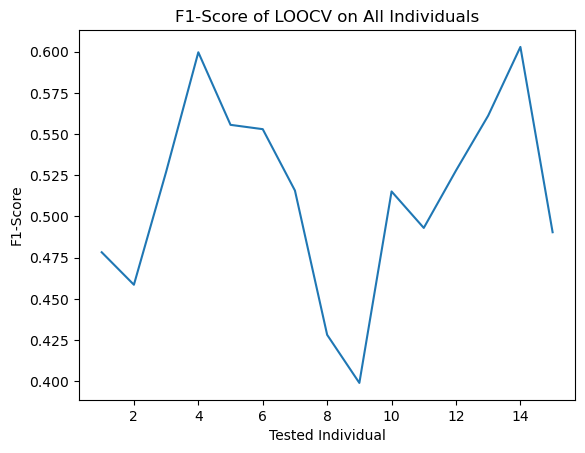

Average Accuracy:  0.6250181779515795
Average F1-Score:  0.5136758651165679


In [ ]:
## specific_windowed_features.csv
## number of trees = 300
## 0: no activity
## 1: stairs, soccer, cycling, walking

dataframes = {}
for i in range(15):
    name = f"data{i+1}"
    data = pd.read_csv(f"HAR/ppg+dalia/data/PPG_FieldStudy/S{i+1}/S{i+1}_E4/specific_windowed_features.csv")
    allFeatures  = [col for col in data.columns if col not in ["start_time", "end_time"]]
    data = data[allFeatures]
    data = data[~data['activity'].isin([1, 2, 7, 8, 9])]
    data.loc[data['activity'].isin([3, 4, 5, 6]), 'activity'] = 1
    dataframes[name] = data

LOOCVAccuracy = np.array([])
LOOCVf1_score = np.array([])
for tester in dataframes:
    trainingFeatures  = [col for col in dataframes[tester].columns if col not in ["activity", "start_time", "end_time"]]

    testingFeatures = dataframes[tester][trainingFeatures].to_numpy()
    testingActivity = dataframes[tester]["activity"].to_numpy()

    X_train = pd.DataFrame()
    y_train = pd.DataFrame()
    for trainer in dataframes:
        if trainer != tester:
            X_train = pd.concat([X_train, dataframes[trainer][trainingFeatures]], ignore_index=True)
            y_train = pd.concat([y_train, dataframes[trainer]["activity"]], ignore_index=True)

    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy().flatten()

    testingFeatures = StandardScaler().fit_transform(testingFeatures)
    X_train = StandardScaler().fit_transform(X_train)

    rf = RandomForestClassifier(n_estimators=300)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(testingFeatures)
    cmat = confusion_matrix(testingActivity, y_pred) #validate model predictions with actual y values
    labels = ["No Activity", "Activity"]

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cmat, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix when testing on {tester}")
    plt.show()

    LOOCVAccuracy = np.append(LOOCVAccuracy, accuracy_score(testingActivity, y_pred))
    LOOCVf1_score = np.append(LOOCVf1_score, f1_score(testingActivity, y_pred))

    print(f"{tester} has been tested on everyone")

plt.plot(np.arange(1,16), LOOCVAccuracy)
plt.title("Accuracy of LOOCV on All Individuals")
plt.xlabel("Tested Individual")
plt.ylabel("Accuracy")
plt.show()

plt.plot(np.arange(1,16), LOOCVf1_score)
plt.title("F1-Score of LOOCV on All Individuals")
plt.xlabel("Tested Individual")
plt.ylabel("F1-Score")
plt.show()

print("Average Accuracy: ", np.mean(LOOCVAccuracy))
print("Average F1-Score: ", np.mean(LOOCVf1_score))

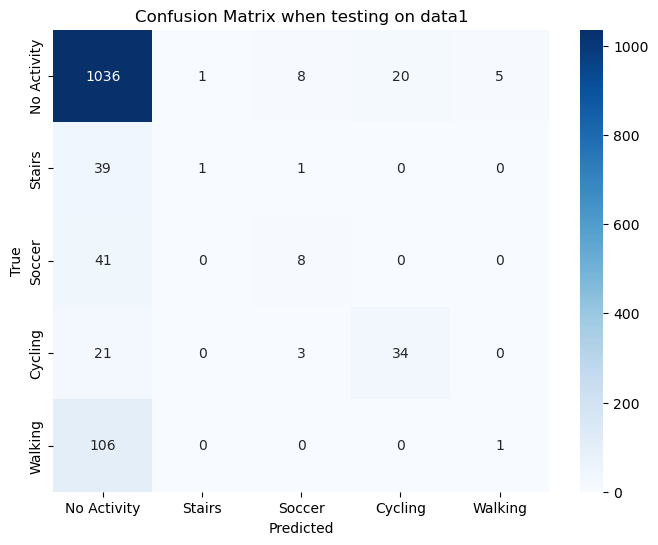

data1 has been tested on everyone


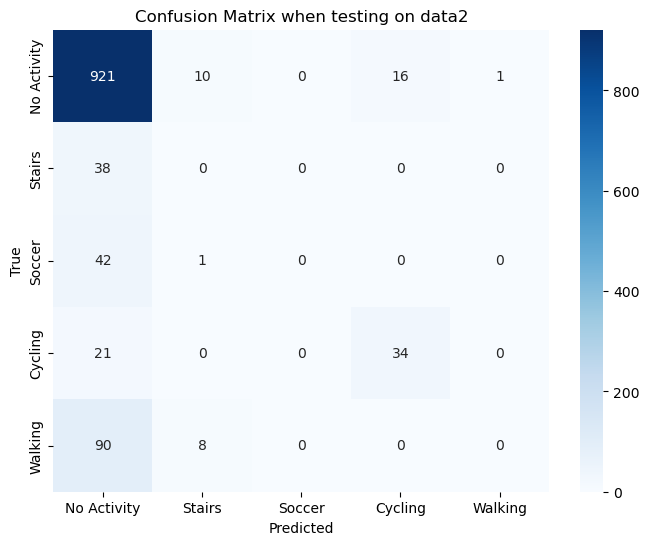

data2 has been tested on everyone


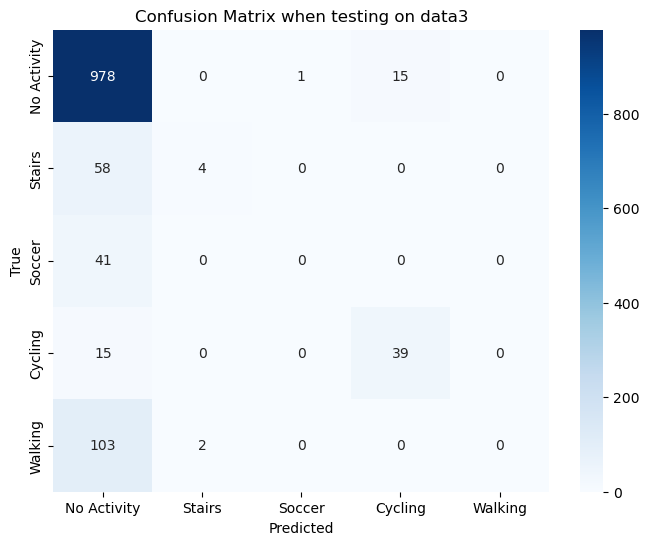

data3 has been tested on everyone


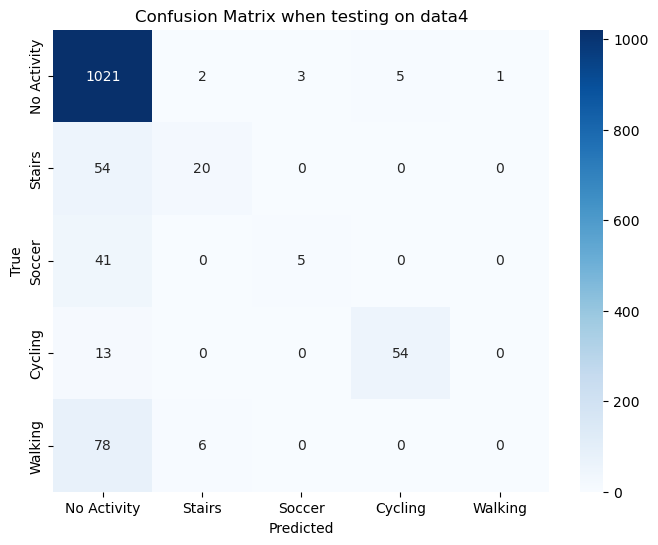

data4 has been tested on everyone


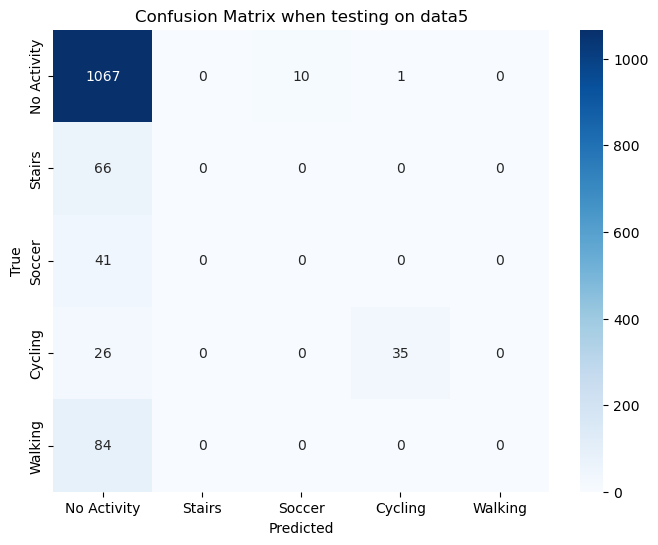

data5 has been tested on everyone


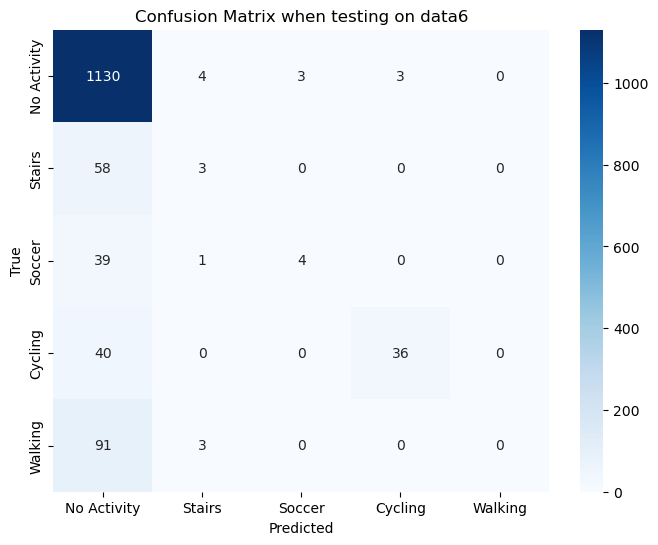

data6 has been tested on everyone


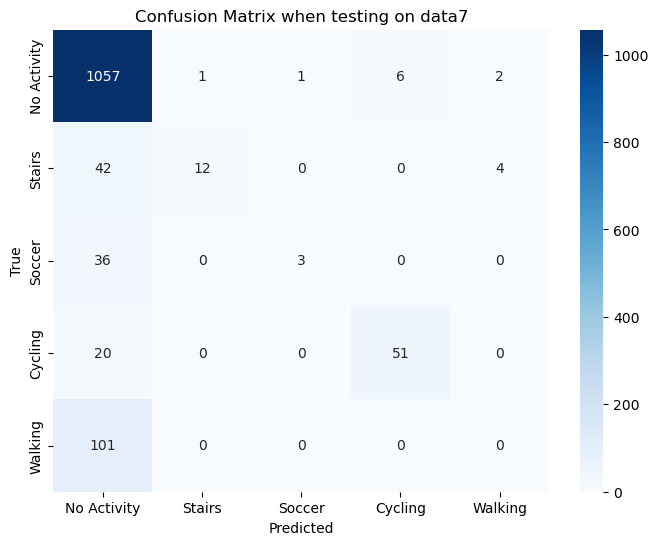

data7 has been tested on everyone


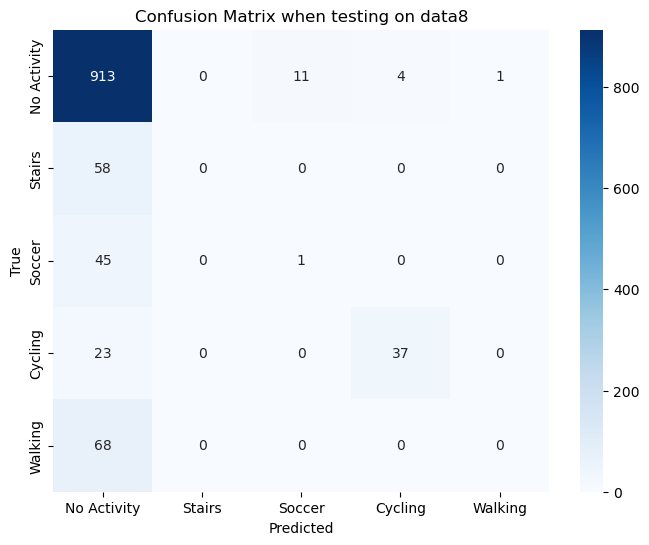

data8 has been tested on everyone


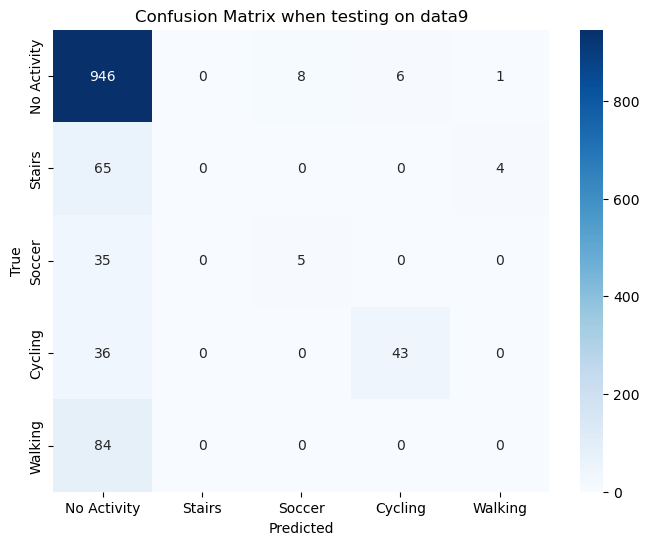

data9 has been tested on everyone


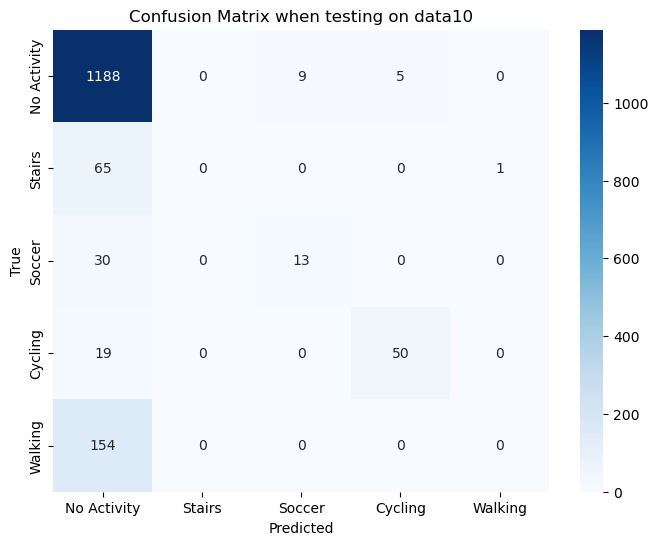

data10 has been tested on everyone


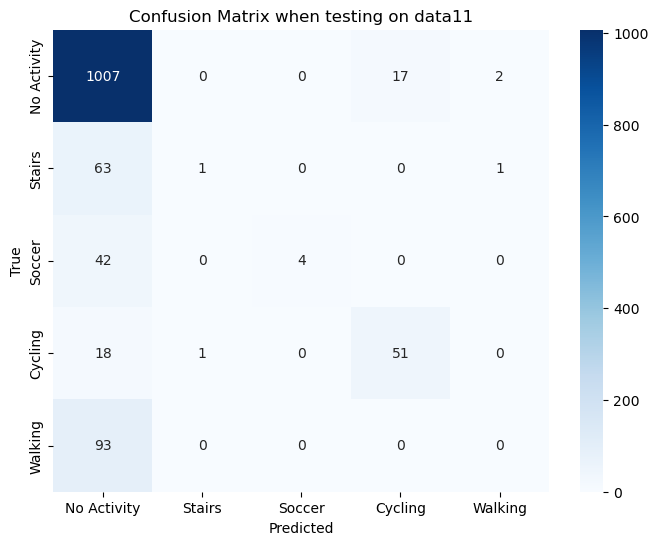

data11 has been tested on everyone


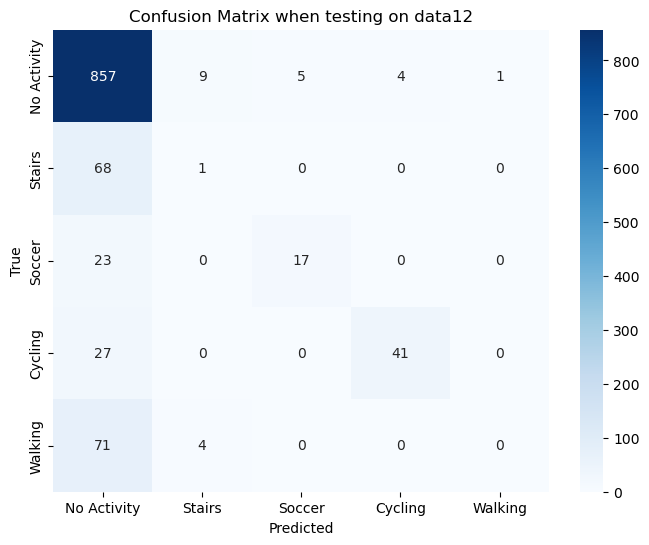

data12 has been tested on everyone


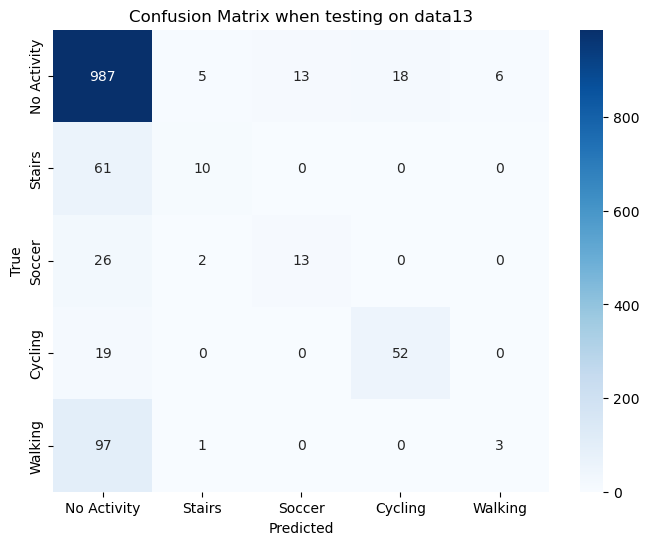

data13 has been tested on everyone


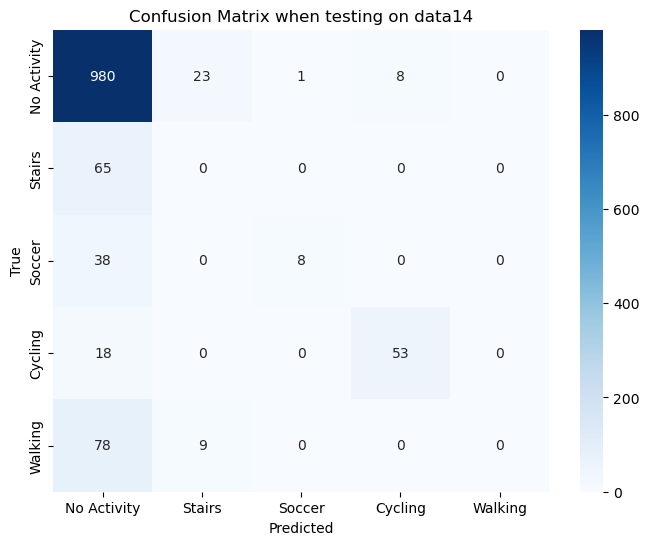

data14 has been tested on everyone


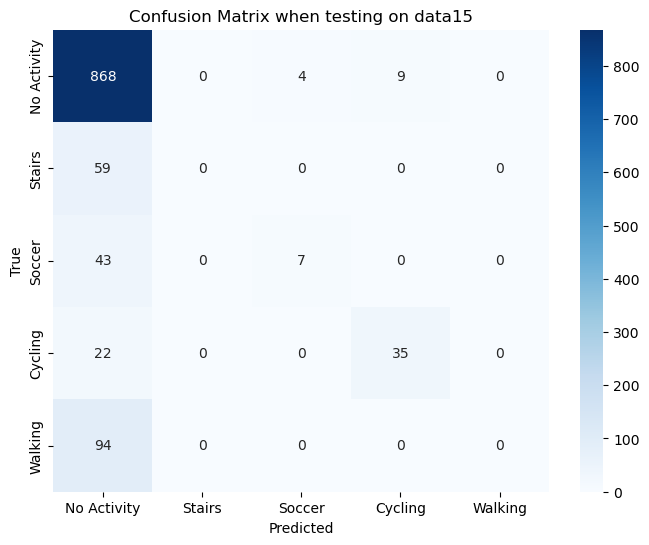

data15 has been tested on everyone


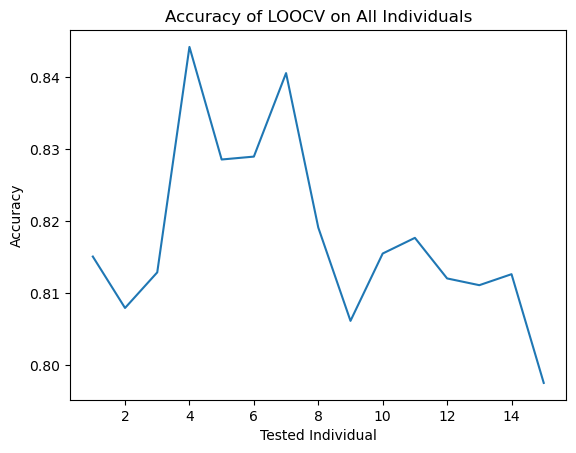

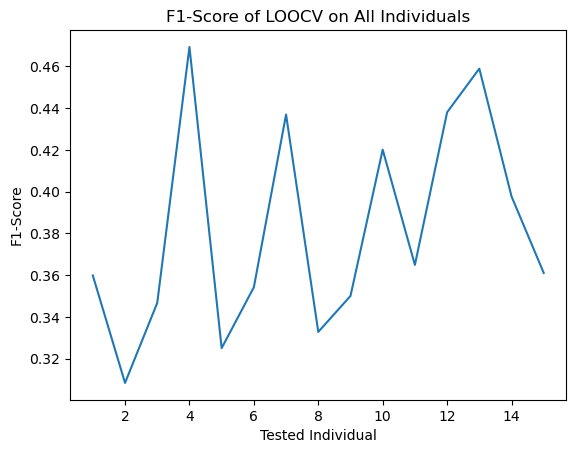

Average Accuracy:  0.8180085037450482
Average F1-Score:  0.3815782407245062


In [ ]:
## specific_windowed_features.csv
## gamma = 'scale'
## 1: no_activity, baseline, clean_baseline, lunch, working, driving
## 2: stairs
## 3: soccer
## 4: cycling
## 5: walking

dataframes = {}
for i in range(15):
    name = f"data{i+1}"
    data = pd.read_csv(f"HAR/ppg+dalia/data/PPG_FieldStudy/S{i+1}/S{i+1}_E4/specific_windowed_features.csv")
    allFeatures  = [col for col in data.columns if col not in ["start_time", "end_time"]]
    data = data[allFeatures]
    data.loc[data['activity'].isin([0, 1, 2, 7, 8, 9]), 'activity'] = 1
    dataframes[name] = data

LOOCVAccuracy = np.array([])
LOOCVf1_score = np.array([])
for tester in dataframes:
    trainingFeatures  = [col for col in dataframes[tester].columns if col not in ["activity", "start_time", "end_time"]]

    testingFeatures = dataframes[tester][trainingFeatures].to_numpy()
    testingActivity = dataframes[tester]["activity"].to_numpy()

    X_train = pd.DataFrame()
    y_train = pd.DataFrame()
    for trainer in dataframes:
        if trainer != tester:
            X_train = pd.concat([X_train, dataframes[trainer][trainingFeatures]], ignore_index=True)
            y_train = pd.concat([y_train, dataframes[trainer]["activity"]], ignore_index=True)

    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy().flatten()

    testingFeatures = StandardScaler().fit_transform(testingFeatures)
    X_train = StandardScaler().fit_transform(X_train)

    rf = RandomForestClassifier(n_estimators=300)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(testingFeatures)
    cmat = confusion_matrix(testingActivity, y_pred) #validate model predictions with actual y values
    labels = ["No Activity", "Stairs", "Soccer", "Cycling", "Walking"]

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cmat, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix when testing on {tester}")
    plt.show()

    LOOCVAccuracy = np.append(LOOCVAccuracy, accuracy_score(testingActivity, y_pred))
    LOOCVf1_score = np.append(LOOCVf1_score, f1_score(testingActivity, y_pred, average='macro'))

    print(f"{tester} has been tested on everyone")

plt.plot(np.arange(1,16), LOOCVAccuracy)
plt.title("Accuracy of LOOCV on All Individuals")
plt.xlabel("Tested Individual")
plt.ylabel("Accuracy")
plt.show()

plt.plot(np.arange(1,16), LOOCVf1_score)
plt.title("F1-Score of LOOCV on All Individuals")
plt.xlabel("Tested Individual")
plt.ylabel("F1-Score")
plt.show()

print("Average Accuracy: ", np.mean(LOOCVAccuracy))
print("Average F1-Score: ", np.mean(LOOCVf1_score))